In [1]:
import graphviz
import localutils as lu
import numpy as np
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif

# Synthetic V3

In [2]:
X, y, feature_names = lu.load_hugin_dataset('synthetic_v3_1000.dat', 'Class')

## Mutual info

In [3]:
mis = mutual_info_classif(X, y, discrete_features=True)
for i in np.argsort(feature_names):
    print("%s:\t%0.4f" %(feature_names[i], mis[i]))

F1:	0.2113
F2:	0.0874
F3:	0.0002
F4:	0.1714


In [4]:
fis = mis / mis.sum()
for i in np.argsort(feature_names):
    print("%s:\t%0.4f" %(feature_names[i], fis[i]))

F1:	0.4492
F2:	0.1859
F3:	0.0004
F4:	0.3645


## Decision Trees

In [5]:
clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=None)
clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

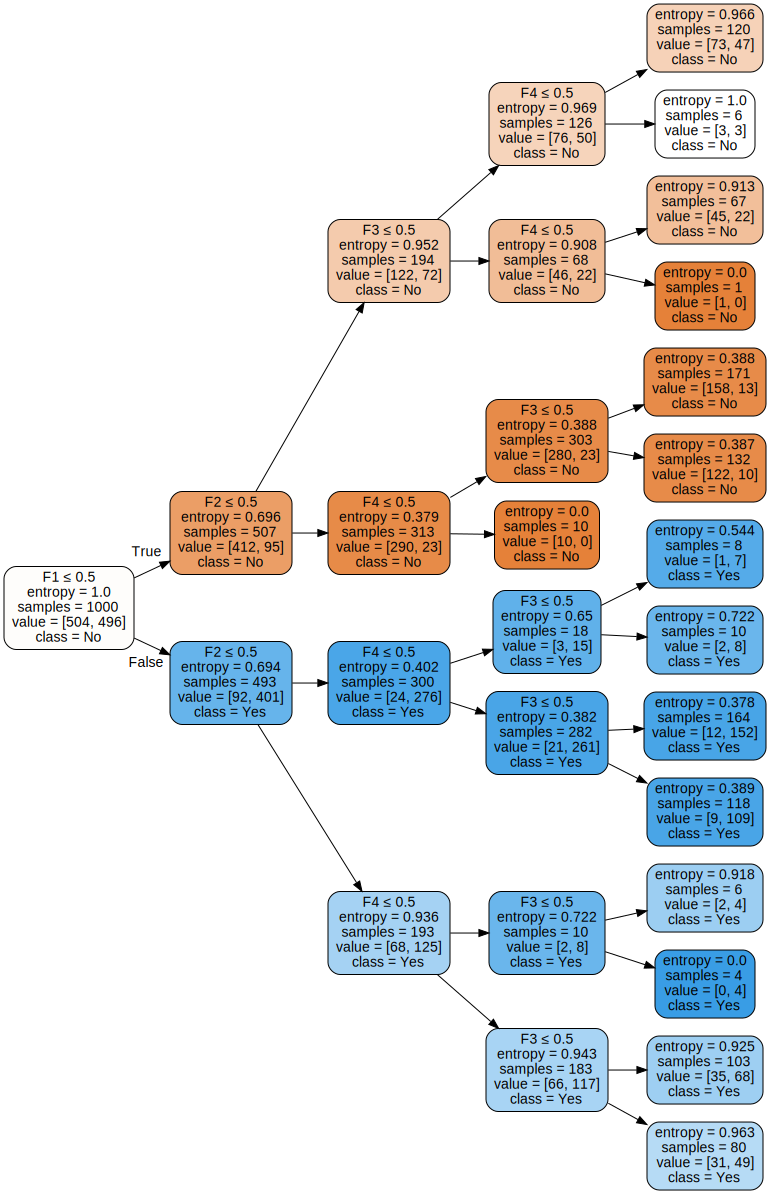

In [6]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=feature_names, class_names=clf.classes_,
                                max_depth=None, 
                                filled=True, rounded=True, rotate=True, special_characters=True)  
graph = graphviz.Source(dot_data)
graph.render()
graph

In [7]:
fis = clf.feature_importances_
for i in np.argsort(feature_names):
    print("%s:\t%0.4f" %(feature_names[i], fis[i]))

F1:	0.7578
F2:	0.2254
F3:	0.0072
F4:	0.0096


In [8]:
clf = RandomForestClassifier(n_estimators=100, criterion='entropy')
clf = clf.fit(X, y)

In [9]:
fis = clf.feature_importances_
for i in np.argsort(feature_names):
    print("%s:\t%0.4f" %(feature_names[i], fis[i]))

F1:	0.4538
F2:	0.2463
F3:	0.0123
F4:	0.2875


# Iris Dataset

In [10]:
from sklearn.datasets import load_iris

In [11]:
iris=load_iris()

In [12]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [13]:
X = iris.data
y = iris.target
feature_names = iris.feature_names

## Mutual Info

In [14]:
mis = mutual_info_classif(X, y, discrete_features=False)

In [15]:
for i in np.argsort(feature_names):
    print("%s:\t%0.4f" %(feature_names[i], mis[i]))

petal length (cm):	0.9905
petal width (cm):	0.9936
sepal length (cm):	0.4612
sepal width (cm):	0.2495


In [16]:
fis = mis / mis.sum()
for i in np.argsort(feature_names):
    print("%s:\t%0.4f" %(feature_names[i], fis[i]))

petal length (cm):	0.3676
petal width (cm):	0.3687
sepal length (cm):	0.1711
sepal width (cm):	0.0926


## Decision Trees

In [17]:
clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=None)
clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

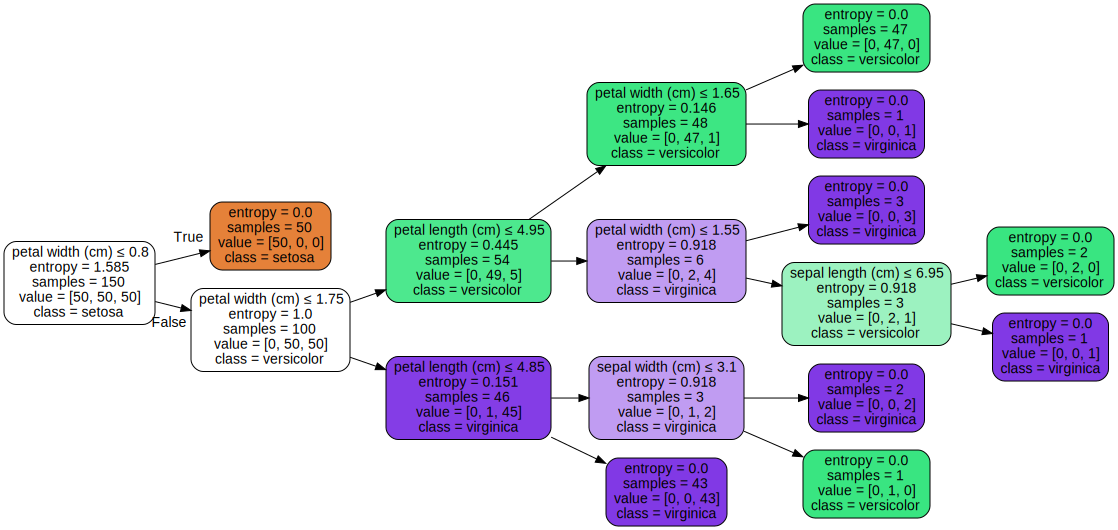

In [18]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=feature_names, class_names=iris.target_names,
                                max_depth=None,
                                filled=True, rounded=True, rotate=True, special_characters=True)  
graph = graphviz.Source(dot_data)
graph.render()
graph

In [19]:
fis = clf.feature_importances_
for i in np.argsort(feature_names):
    print("%s:\t%0.4f" %(feature_names[i], fis[i]))

petal length (cm):	0.0661
petal width (cm):	0.9108
sepal length (cm):	0.0116
sepal width (cm):	0.0116


In [20]:
clf = RandomForestClassifier(n_estimators=100, criterion='entropy')
clf = clf.fit(X, y)

In [21]:
fis = clf.feature_importances_
for i in np.argsort(feature_names):
    print("%s:\t%0.4f" %(feature_names[i], fis[i]))

petal length (cm):	0.4250
petal width (cm):	0.4532
sepal length (cm):	0.1015
sepal width (cm):	0.0203


In [51]:
X = np.asarray([['R'], ['G'], ['B']])
y = np.asarray([0, 1, 0])

In [52]:
clf.fit(X, y)

ValueError: could not convert string to float: 'R'

In [53]:
from sklearn.preprocessing import OneHotEncoder

In [54]:
ohe = OneHotEncoder()
ohe.fit(X)
ohe.categories_

[array(['B', 'G', 'R'], dtype='<U1')]

In [55]:
ohe.transform(X).toarray()

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [56]:
Xt = ohe.transform(X)

In [57]:
clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=None)
clf.fit(Xt, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

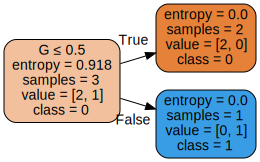

In [58]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=ohe.categories_[0], class_names=['0', '1'],
                                max_depth=None,
                                filled=True, rounded=True, rotate=True, special_characters=True)  
graph = graphviz.Source(dot_data)
#graph.render()
graph

In [59]:
X = np.asarray([['R'], ['G'], ['B']])
y = np.asarray(['c1', 'c2', 'c3'])

In [61]:
ohe = OneHotEncoder()
ohe.fit(X)
ohe.categories_

[array(['B', 'G', 'R'], dtype='<U1')]

In [64]:
Xt = ohe.transform(X)

In [66]:
clf.fit(Xt, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

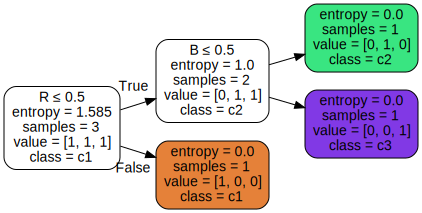

In [68]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=ohe.categories_[0], class_names=['c1', 'c2', 'c3'],
                                max_depth=None,
                                filled=True, rounded=True, rotate=True, special_characters=True)  
graph = graphviz.Source(dot_data)
#graph.render()
graph